# Import libraries

In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive/Colab Notebooks/TX

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive/Colab Notebooks/TX


In [2]:
import cv2
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from tqdm import tqdm

# Functions

In [3]:
def load_videos(folder_path):
    """
    Load frames from video files found in specified folders into a NumPy array.
    Each frame of a video will be loaded as a separate image.

    Args:
        folder_path: Path to the root folder.

    Returns:
        images: List of uploaded images (NumPy arrays).
        paths: List of paths to original video files with frame index (e.g., 'path/to/video.mp4#frame_0001').
    """

    images = []
    paths = []

    # Define common video file extensions to search for
    # .avi is included here.
    video_extensions = ['*.mp4', '*.avi', '*.mov', '*.mkv', '*.flv', '*.wmv']

    base_folders = []
    # Iterate through items in the root folder to find the desired base folders
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        # Check if the item is a directory and matches the new naming convention
        # (e.g., "blood_donor_1", "blood_donor_2" as shown in the second image)
        if os.path.isdir(item_path) and item.startswith("blood_donor_"):
            base_folders.append(item_path)

    # If no folders are found, print a message and return empty lists
    if not base_folders:
        print("No folders found matching the pattern 'blood_donor_*'.")
        return images, paths

    print(f"Found {len(base_folders)} folders:")
    for folder in base_folders:
        print(f"- {os.path.basename(folder)}")

    # Process each identified base folder
    for base_folder in base_folders:
        print(f"Scanning the folder: {os.path.basename(base_folder)}")

        video_files_in_folder = []
        # Find all video files recursively within the base folder using all defined extensions
        for ext in video_extensions:
            video_files_in_folder.extend(glob.glob(os.path.join(base_folder, '**', ext), recursive=True))

        # Sort the video files for consistent processing order
        video_files_in_folder.sort()

        # Use tqdm for a progress bar while loading frames from videos
        for video_file in tqdm(video_files_in_folder, desc=f"Loading frames from videos in {os.path.basename(base_folder)}"):
            cap = cv2.VideoCapture(video_file) # Create a VideoCapture object

            if not cap.isOpened():
                print(f"Warning: Could not open video file {video_file}. Skipping.")
                continue

            frame_idx = 0
            while True:
                ret, frame = cap.read() # Read a frame from the video
                if not ret:
                    break # Break the loop if no more frames are available or an error occurred

                # Convert the frame from BGR (OpenCV default) to RGB
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                images.append(frame_rgb)
                # Store the original video path with a frame index to identify each unique image
                paths.append(f"{video_file}#frame_{frame_idx:04d}") # Format index with leading zeros

                frame_idx += 1

            cap.release() # Release the VideoCapture object after processing the video

    print(f"Completed! Loaded {len(images)} images (frames) in total.")

    return images, paths

In [3]:
# Function to find and load alll BMP into an array
def load_images_to_array_input(folder_path, categories):
    """
    Load all BMP images from the specified folders into a NumPy array

    Args:
        folder_path: Path to the root folder
        categories: Categories of images

    Returns:
        images: List of uploaded images
        labels: List of labels for each image (category)
        paths: List of paths to original files
    """

    images = []
    labels = []
    paths = []

    category_to_idx = {cat: idx for idx, cat in enumerate(categories)}

    base_folders = []
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        if os.path.isdir(item_path) and "Crop_Pics_w_parameters_" in item and "mbar" in item:
            base_folders.append(item_path)

    if not base_folders:
        print("No folder found in correct format.")
        return images, labels, paths

    print(f"Found {len(base_folders)} folders:")
    for folder in base_folders:
        print(f"- {os.path.basename(folder)}")

    for base_folder in base_folders:
        print(f"Scanning the folder: {os.path.basename(base_folder)}")

        for category in categories:
            category_path = os.path.join(base_folder, category)

            if os.path.isdir(category_path):
                print(f"Found category: {category}")

                bmp_files = glob.glob(os.path.join(category_path, '**', '*.bmp'), recursive=True)

                for bmp_file in tqdm(bmp_files, desc=f"Loading {category}"):
                    img = cv2.imread(bmp_file)

                    if img is not None:
                        # Convert from BGR to RGB
                        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                        images.append(img_rgb)
                        labels.append(category_to_idx[category])
                        paths.append(bmp_file)

    print(f"Completed! Loaded {len(images)} images in total.")

    for category, idx in category_to_idx.items():
        count = labels.count(idx)
        print(f"  - {category}: {count} images")

    return images, labels, paths

def load_images_to_array(folder_path, categories):
    """
    Load all BMP images from the specified folders into a NumPy array

    Args:
        folder_path: Path to the root folder
        categories: Categories of images

    Returns:
        images: List of uploaded images
        labels: List of labels for each image (category)
        paths: List of paths to original files

    """

    images = []
    labels = []
    paths = []

    category_to_idx = {cat: idx for idx, cat in enumerate(categories)}

    if not os.path.exists(folder_path):
        print(f"ERROR: {folder_path} don't exist!")
        return images, labels, paths

    print(f"Folder: {folder_path}")

    print("Searching images")
    for category in categories:
        category_path = os.path.join(folder_path, category)

        if os.path.isdir(category_path):
            print(f"Found category: {category}")

            bmp_files = glob.glob(os.path.join(category_path, '**', '*.bmp'), recursive=True)

            for bmp_file in tqdm(bmp_files, desc=f"Loading {category}"):
                img = cv2.imread(bmp_file)

                if img is not None:
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                    images.append(img_rgb)
                    labels.append(category_to_idx[category])
                    paths.append(bmp_file)

    print(f"Completed! Loaded {len(images)} images in total.")

    for category, idx in category_to_idx.items():
        count = labels.count(idx)
        print(f"  - {category}: {count} images")

    return images, labels, paths

# Function to visualize images
def show_sample_images(images, labels, categories, num_samples=5):
    """
    View some sample images by category

    Args:
        images: List of images
        labels: List of labels
        categories: List of categories
        num_samples: Number of samples to display per category
    """

    if not images:
        print("No images to visualized")
        return

    fig, axes = plt.subplots(len(categories), num_samples, figsize=(15, 3*len(categories)))

    for cat_idx, category in enumerate(categories):
        cat_indices = [i for i, label in enumerate(labels) if label == cat_idx]

        samples = min(num_samples, len(cat_indices))

        for sample_idx in range(samples):
            if len(categories) > 1:
                ax = axes[cat_idx, sample_idx]
            else:
                ax = axes[sample_idx]

            img_idx = cat_indices[sample_idx]

            ax.imshow(images[img_idx])
            ax.set_title(f"{category}")
            ax.axis('off')

        for j in range(samples, num_samples):
            if len(categories) > 1:
                axes[cat_idx, j].axis('off')
            else:
                axes[j].axis('off')

    plt.tight_layout()
    plt.show()

# Function to convert list into NumPy
def convert_to_numpy_arrays(images, labels):
    """
    Converts lists of images and labels to NumPy arrays

    Args:
        images: List of images
        labels: List of labels

    Returns:
        X: NumPy array containing all images
        y: Array NumPy containing all labels
    """

    if images:
        heights = [img.shape[0] for img in images]
        widths = [img.shape[1] for img in images]
        channels = [img.shape[2] for img in images]

        if len(set(heights)) > 1 or len(set(widths)) > 1 or len(set(channels)) > 1:
            print("WARNING: Images have different sizes!")
            print(f"Height: {set(heights)}")
            print(f"Width: {set(widths)}")
            print(f"Channel: {set(channels)}")

            from collections import Counter
            common_height = Counter(heights).most_common(1)[0][0]
            common_width = Counter(widths).most_common(1)[0][0]
            common_channels = Counter(channels).most_common(1)[0][0]

            print(f"Resizing all images to {common_height}x{common_width}x{common_channels}")

            resized_images = []
            for img in tqdm(images, desc="Image resizing"):
                if img.shape != (common_height, common_width, common_channels):
                    resized = cv2.resize(img, (common_width, common_height))
                    resized_images.append(resized)
                else:
                    resized_images.append(img)

            X = np.stack(resized_images, axis=0)
        else:
            X = np.stack(images, axis=0)
    else:
        X = np.array([])

    y = np.array(labels)

    return X, y


In [4]:
def load_images_to_array_nouaman(folder_path, categories):
    """
    Load all BMP images from Dataset_Nouaman where categories are at top level
    and mbar folders are inside each category

    Args:
        folder_path: Path to the Dataset_Nouaman folder
        categories: List of categories (Slipper, Croissant, Other)

    Returns:
        images: List of uploaded images
        labels: List of labels for each image (category)
        paths: List of paths to original files
    """
    images = []
    labels = []
    paths = []

    category_to_idx = {cat: idx for idx, cat in enumerate(categories)}

    # Process each category folder
    for category in categories:
        category_path = os.path.join(folder_path, category)

        if not os.path.isdir(category_path):
            print(f"Warning: Category folder {category} not found")
            continue

        print(f"Processing category: {category}")

        # Find all mbar folders within this category
        mbar_folders = []
        for item in os.listdir(category_path):
            item_path = os.path.join(category_path, item)
            if os.path.isdir(item_path) and "mbar" in item:
                mbar_folders.append(item_path)

        if not mbar_folders:
            print(f"No mbar folders found in {category}")
            continue

        print(f"Found {len(mbar_folders)} mbar folders in {category}:")
        for folder in mbar_folders:
            print(f"- {os.path.basename(folder)}")

        # Process each mbar folder in this category
        for mbar_folder in mbar_folders:
            print(f"Scanning {os.path.basename(mbar_folder)} in {category}")

            # Find all BMP files in this mbar folder
            bmp_files = glob.glob(os.path.join(mbar_folder, '**', '*.BMP'), recursive=True)

            for bmp_file in tqdm(bmp_files, desc=f"Loading {category}/{os.path.basename(mbar_folder)}"):
                img = cv2.imread(bmp_file)

                if img is not None:
                    # Convert from BGR to RGB
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                    images.append(img_rgb)
                    labels.append(category_to_idx[category])
                    paths.append(bmp_file)

    print(f"Completed! Loaded {len(images)} images in total.")

    for category, idx in category_to_idx.items():
        count = labels.count(idx)
        print(f"  - {category}: {count} images")

    return images, labels, paths
from PIL import Image # Import Pillow for multi-page TIFFs
import numpy as np # Import numpy for array conversion

def load_images_to_array_tif(folder_path):
    """
    Load all TIF images (including multi-page TIFs) from the specified folders into a NumPy array.
    Each page of a multi-page TIF will be loaded as a separate image.

    Args:
        folder_path: Path to the root folder.

    Returns:
        images: List of uploaded images (NumPy arrays).
        paths: List of paths to original files, with frame index for multi-page TIFs (e.g., 'path/to/image.tif#0').
    """

    images = []
    paths = []

    base_folders = []
    # Iterate through items in the root folder to find the desired base folders
    for item in os.listdir(folder_path):
        item_path = os.path.join(folder_path, item)
        # Check if the item is a directory and matches the naming convention "v * cm_s"
        if os.path.isdir(item_path) and item.startswith("v ") and item.endswith(" cm_s"):
            base_folders.append(item_path)

    # If no folders are found, print a message and return empty lists
    if not base_folders:
        print("No folders found matching the pattern 'v * cm_s'.")
        return images, paths

    print(f"Found {len(base_folders)} folders:")
    for folder in base_folders:
        print(f"- {os.path.basename(folder)}")

    # Process each identified base folder
    for base_folder in base_folders:
        print(f"Scanning the folder: {os.path.basename(base_folder)}")

        # Find all .tif files recursively within the base folder
        tif_files = glob.glob(os.path.join(base_folder, '**', '*.tif'), recursive=True)

        # Use tqdm for a progress bar while loading images
        for tif_file in tqdm(tif_files, desc=f"Loading images from {os.path.basename(base_folder)}"):
            try:
                # Open the TIFF file using Pillow
                with Image.open(tif_file) as img_pil:
                    # Check if it's a multi-page TIFF
                    if hasattr(img_pil, 'n_frames') and img_pil.n_frames > 1:
                        # Iterate through each frame (page)
                        for page_idx in range(img_pil.n_frames):
                            img_pil.seek(page_idx)
                            # Convert PIL Image to NumPy array (RGB format directly from Pillow)
                            img_np = np.array(img_pil.convert('RGB'))

                            images.append(img_np)
                            # Store the original path with a frame index to identify each unique image
                            paths.append(f"{tif_file}#{page_idx}")
                    else:
                        # Handle single-page TIFFs
                        img_np = np.array(img_pil.convert('RGB'))
                        images.append(img_np)
                        paths.append(tif_file) # No frame index needed for single page

            except Exception as e:
                print(f"Warning: Could not load TIF file {tif_file}. Error: {e}")

    print(f"Completed! Loaded {len(images)} images in total.")

    return images, paths

In [5]:
import imageio

def save_images_by_category(X, y, output_dir, categories):
    if len(X) == 0:
        print("No image to save")
        return

    os.makedirs(output_dir, exist_ok=True)

    # Crea una cartella per ogni categoria
    category_dirs = {}
    for category in categories:
        category_dir = os.path.join(output_dir, category)
        os.makedirs(category_dir, exist_ok=True)
        category_dirs[category] = category_dir

    # Salva ogni immagine nella sua cartella
    for idx, (img, label_idx) in enumerate(zip(X, y)):
        if label_idx >= len(categories):
            print(f"Warning: Label index {label_idx} fuori range per immagine {idx}")
            continue
        category = categories[label_idx]
        save_path = os.path.join(category_dirs[category], f"img_{idx}.png")
        imageio.imwrite(save_path, img)

    print(f"Saved {len(X)} images in {output_dir}")

def report_folder_distribution(output_dir):
    print("\nDistribution of images in each folder:")
    for root, dirs, files in os.walk(output_dir):
        # Only print folders that contain images
        if files:
            num_images = len([f for f in files if f.endswith('.png')])
            if num_images > 0:
                folder_name = os.path.basename(root)
                print(f"{folder_name}: {num_images} images")

# PLOS dataset


## Input set

Found 12 folders:
- 012_Crop_Pics_w_parameters_1000mbar
- 005_Crop_Pics_w_parameters_300mbar
- 008_Crop_Pics_w_parameters_600mbar
- 006_Crop_Pics_w_parameters_400mbar
- 007_Crop_Pics_w_parameters_500mbar
- 003_Crop_Pics_w_parameters_100mbar
- 004_Crop_Pics_w_parameters_200mbar
- 001_Crop_Pics_w_parameters_20mbar
- 002_Crop_Pics_w_parameters_50mbar
- 009_Crop_Pics_w_parameters_700mbar
- 010_Crop_Pics_w_parameters_800mbar
- 011_Crop_Pics_w_parameters_900mbar
Scanning the folder: 012_Crop_Pics_w_parameters_1000mbar
Found category: Slippers


Loading Slippers: 100%|██████████| 269/269 [00:00<00:00, 269.25it/s]


Found category: Others


Loading Others: 100%|██████████| 39/39 [00:12<00:00,  3.10it/s] 


Scanning the folder: 005_Crop_Pics_w_parameters_300mbar
Found category: Slippers


Loading Slippers: 100%|██████████| 120/120 [00:04<00:00, 24.88it/s]


Found category: Others


Loading Others: 100%|██████████| 253/253 [00:08<00:00, 30.13it/s] 


Found category: Croissants


Loading Croissants: 100%|██████████| 102/102 [00:04<00:00, 24.34it/s]


Scanning the folder: 008_Crop_Pics_w_parameters_600mbar
Found category: Slippers


Loading Slippers: 100%|██████████| 124/124 [00:04<00:00, 27.87it/s] 


Found category: Others


Loading Others: 100%|██████████| 44/44 [00:36<00:00,  1.20it/s]


Found category: Croissants


Loading Croissants: 100%|██████████| 8/8 [00:07<00:00,  1.03it/s]


Scanning the folder: 006_Crop_Pics_w_parameters_400mbar
Found category: Slippers


Loading Slippers: 100%|██████████| 167/167 [00:05<00:00, 32.10it/s] 


Found category: Others


Loading Others: 100%|██████████| 216/216 [00:06<00:00, 35.02it/s] 


Found category: Croissants


Loading Croissants: 100%|██████████| 80/80 [01:06<00:00,  1.20it/s]


Scanning the folder: 007_Crop_Pics_w_parameters_500mbar
Found category: Slippers


Loading Slippers: 100%|██████████| 117/117 [00:04<00:00, 26.79it/s]


Found category: Others


Loading Others: 100%|██████████| 81/81 [01:11<00:00,  1.13it/s]


Found category: Croissants


Loading Croissants: 100%|██████████| 17/17 [00:14<00:00,  1.18it/s]


Scanning the folder: 003_Crop_Pics_w_parameters_100mbar
Found category: Slippers


Loading Slippers: 100%|██████████| 2/2 [00:01<00:00,  1.18it/s]


Found category: Others


Loading Others: 100%|██████████| 38/38 [00:33<00:00,  1.14it/s]


Found category: Croissants


Loading Croissants: 100%|██████████| 165/165 [00:04<00:00, 35.91it/s] 


Scanning the folder: 004_Crop_Pics_w_parameters_200mbar
Found category: Slippers


Loading Slippers: 100%|██████████| 22/22 [00:18<00:00,  1.19it/s]


Found category: Others


Loading Others: 100%|██████████| 210/210 [00:06<00:00, 31.83it/s] 


Found category: Croissants


Loading Croissants: 100%|██████████| 252/252 [00:06<00:00, 36.30it/s] 


Scanning the folder: 001_Crop_Pics_w_parameters_20mbar
Found category: Others


Loading Others: 100%|██████████| 98/98 [01:23<00:00,  1.18it/s]


Found category: Croissants


Loading Croissants: 100%|██████████| 9/9 [00:08<00:00,  1.07it/s]


Scanning the folder: 002_Crop_Pics_w_parameters_50mbar
Found category: Others


Loading Others: 100%|██████████| 43/43 [00:36<00:00,  1.19it/s]


Found category: Croissants


Loading Croissants: 100%|██████████| 9/9 [00:07<00:00,  1.14it/s]


Scanning the folder: 009_Crop_Pics_w_parameters_700mbar
Found category: Slippers


Loading Slippers: 100%|██████████| 105/105 [00:04<00:00, 23.92it/s]


Found category: Others


Loading Others: 100%|██████████| 18/18 [00:15<00:00,  1.19it/s]


Scanning the folder: 010_Crop_Pics_w_parameters_800mbar
Found category: Slippers


Loading Slippers: 100%|██████████| 169/169 [00:04<00:00, 35.63it/s] 


Found category: Others


Loading Others: 100%|██████████| 31/31 [00:25<00:00,  1.22it/s]


Scanning the folder: 011_Crop_Pics_w_parameters_900mbar
Found category: Slippers


Loading Slippers: 100%|██████████| 241/241 [00:06<00:00, 38.57it/s] 


Found category: Others


Loading Others: 100%|██████████| 39/39 [00:35<00:00,  1.10it/s]


Found category: Croissants


Loading Croissants: 100%|██████████| 2/2 [00:01<00:00,  1.12it/s]


Completed! Loaded 3090 images in total.
  - Slippers: 1336 images
  - Others: 1110 images
  - Croissants: 644 images


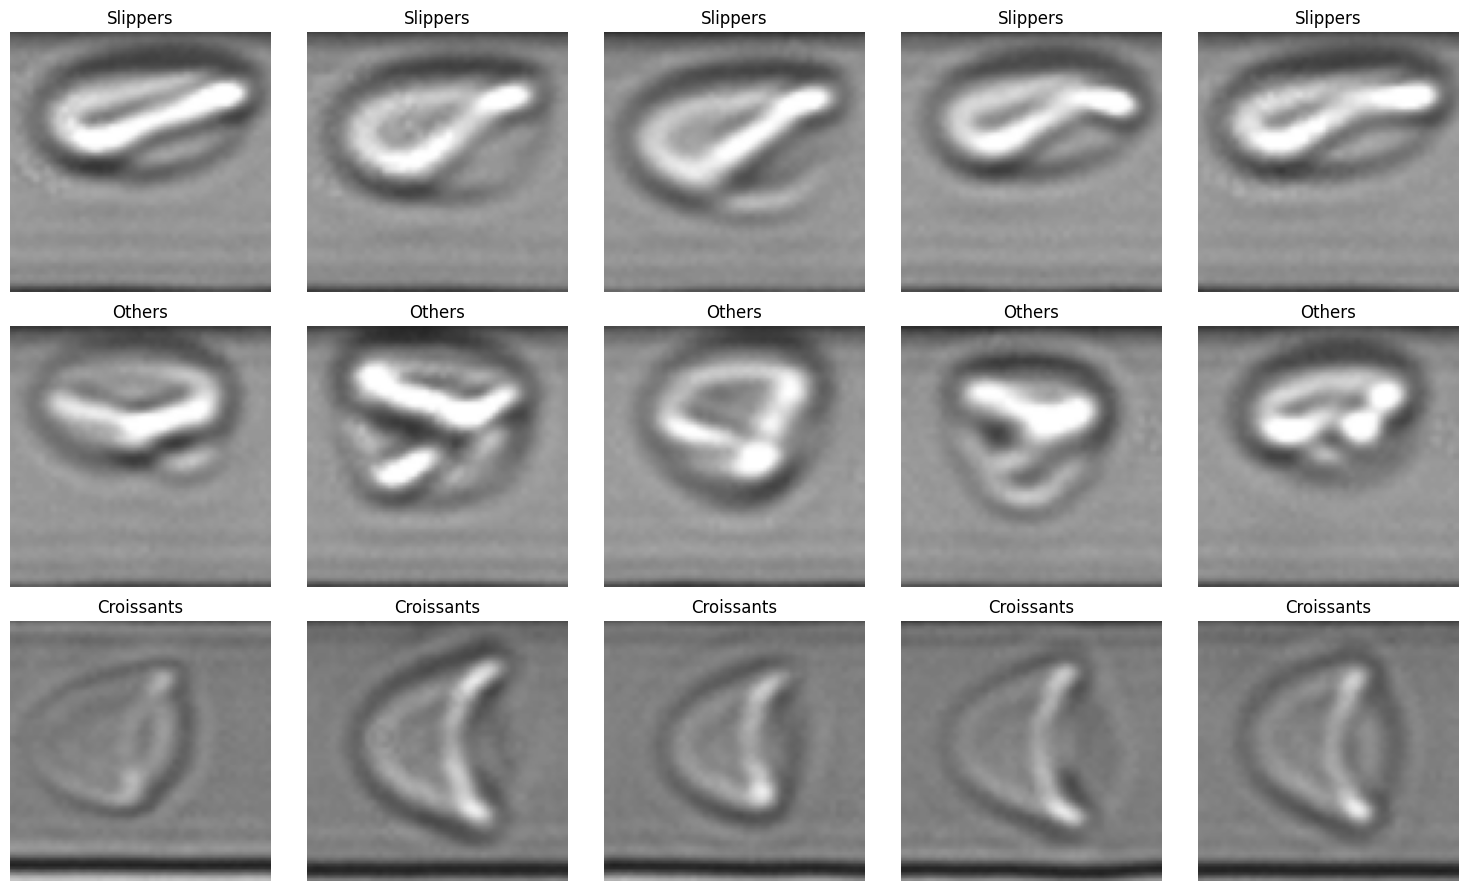

In [ ]:
# Path to your folder containing BMP images
folder_path_plos_input = "/gdrive/My Drive/Colab Notebooks/TX/Dataset_original/Dataset_PLOS/S3_CNN_input_data"

if not os.path.exists(folder_path_plos_input):
  print(f"ERROR: {folder_path_plos_input} not found!")

# Categories target
categories_plos_input = ['Slippers', 'Others', 'Croissants']

# Load images
images_plos_input, labels_plos_input, paths_plos_input = load_images_to_array_input(folder_path_plos_input, categories_plos_input)

# Visualize images
if images_plos_input:
    show_sample_images(images_plos_input, labels_plos_input, categories_plos_input)



Images (X):
  Shape: (3090, 90, 90, 3)
  Type: uint8

Labels (y):
  Shape: (3090,)
  Type: int64


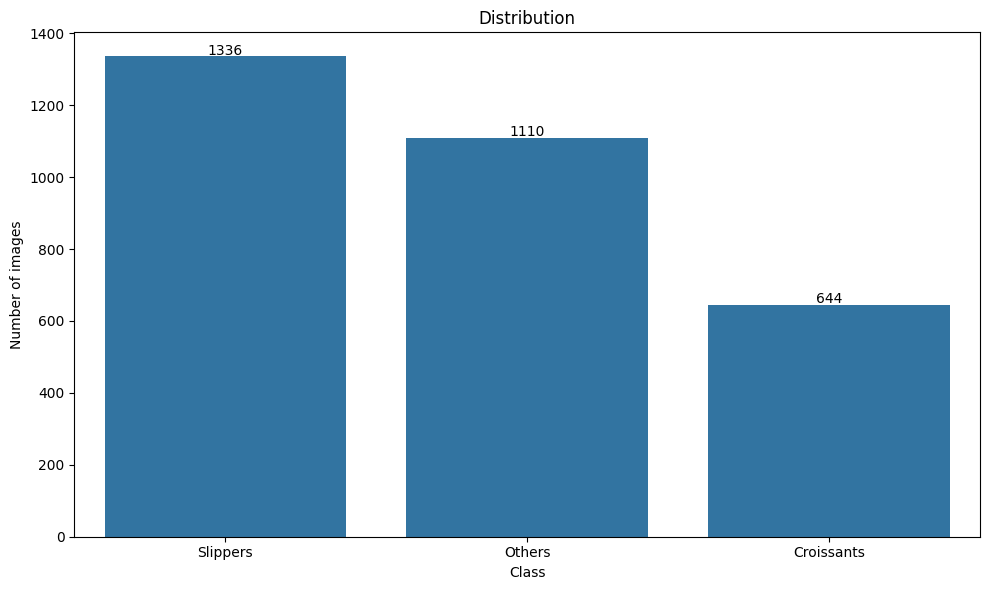

In [ ]:
# Convert into array NumPy
X_plos_input, y_plos_input = convert_to_numpy_arrays(images_plos_input, labels_plos_input)

if X_plos_input.size > 0:
    print("\nImages (X):")
    print(f"  Shape: {X_plos_input.shape}")
    print(f"  Type: {X_plos_input.dtype}")

    print("\nLabels (y):")
    print(f"  Shape: {y_plos_input.shape}")
    print(f"  Type: {y_plos_input.dtype}")

    unique, counts = np.unique(y_plos_input, return_counts=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=unique, y=counts)
    plt.title('Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of images')
    plt.xticks(range(len(categories_plos_input)), categories_plos_input)

    for i, count in enumerate(counts):
        plt.text(i, count + 5, str(count), ha='center')

    plt.tight_layout()
    plt.show()

## Training set

Folder: /gdrive/My Drive/Colab Notebooks/TX/Dataset_PLOS/S4_CNN_training_data
Searching images
Found category: Slipper


Loading Slipper: 100%|██████████| 3000/3000 [01:19<00:00, 37.77it/s] 


Found category: Sheared


Loading Sheared: 100%|██████████| 2000/2000 [00:50<00:00, 39.47it/s] 


Found category: Croissant


Loading Croissant: 100%|██████████| 3000/3000 [01:17<00:00, 38.52it/s] 


Completed! Loaded 8000 images in total.
  - Slipper: 3000 images
  - Sheared: 2000 images
  - Croissant: 3000 images


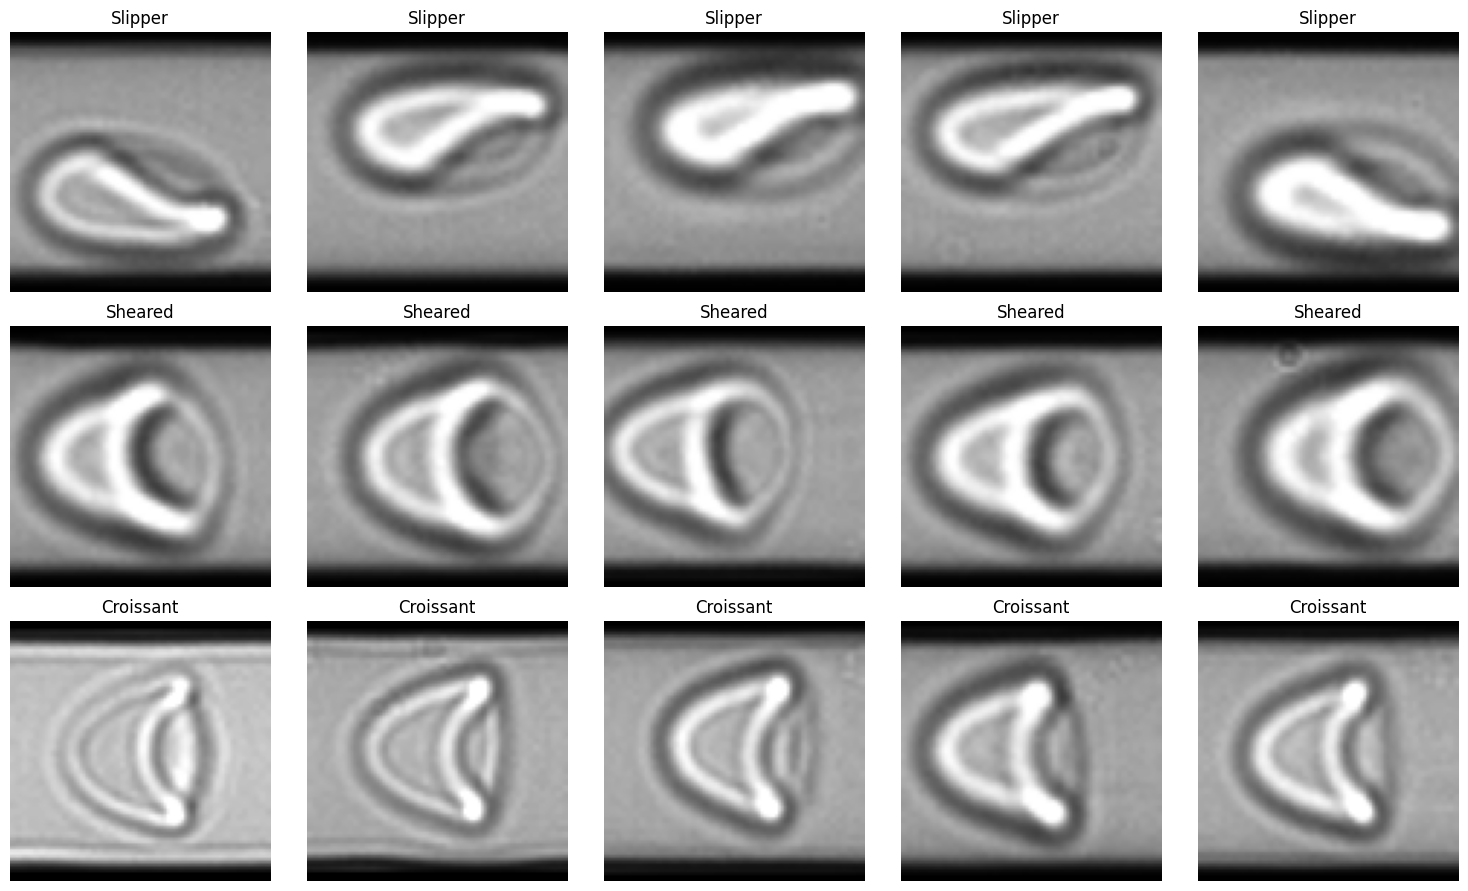

In [ ]:
folder_path_plos_training = "/gdrive/My Drive/Colab Notebooks/TX/Dataset_original/Dataset_PLOS/S4_CNN_training_data"

if not os.path.exists(folder_path_plos_training):
  print(f"ERROR: {folder_path_plos_training} not found!")

# Categories target
categories_plos_training = ['Slipper', 'Sheared', 'Croissant']

# Load images
images_plos_training, labels_plos_training, paths_plos_training = load_images_to_array(folder_path_plos_training, categories_plos_training)

# Visualize images
if images_plos_training:
    show_sample_images(images_plos_training, labels_plos_training, categories_plos_training)



Images (X):
  Shape: (8000, 90, 90, 3)
  Type: uint8

Labels (y):
  Shape: (8000,)
  Type: int64


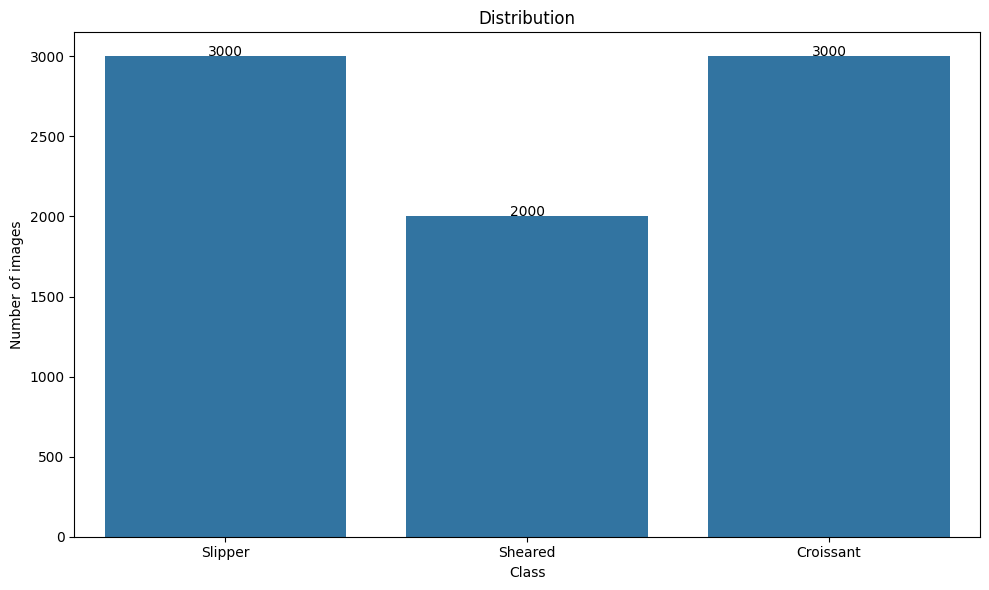

In [ ]:
# Convert into array NumPy
X_plos_training, y_plos_training = convert_to_numpy_arrays(images_plos_training, labels_plos_training)

if X_plos_training.size > 0:
    print("\nImages (X):")
    print(f"  Shape: {X_plos_training.shape}")
    print(f"  Type: {X_plos_training.dtype}")

    print("\nLabels (y):")
    print(f"  Shape: {y_plos_training.shape}")
    print(f"  Type: {y_plos_training.dtype}")

    unique, counts = np.unique(y_plos_training, return_counts=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=unique, y=counts)
    plt.title('Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of images')
    plt.xticks(range(len(categories_plos_training)), categories_plos_training)

    for i, count in enumerate(counts):
        plt.text(i, count + 5, str(count), ha='center')

    plt.tight_layout()
    plt.show()

## Union of two sets

(11090, 90, 90, 3) (11090,)


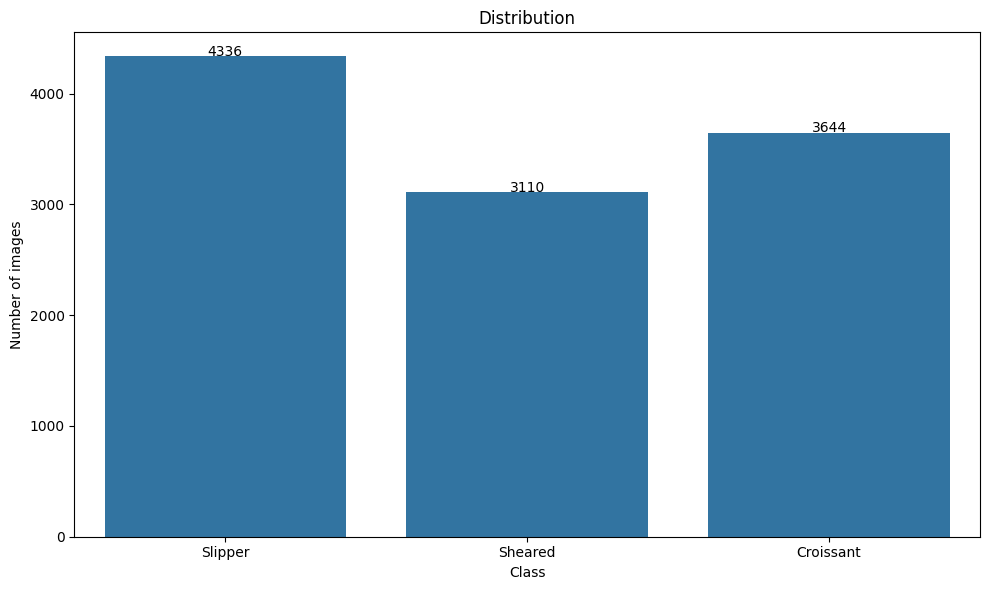

In [ ]:
X_plos_total = np.concatenate((X_plos_training, X_plos_input), axis=0)
y_plos_total = np.concatenate((y_plos_training, y_plos_input), axis=0)

print(X_plos_total.shape, y_plos_total.shape)

unique, counts = np.unique(y_plos_total, return_counts=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=unique, y=counts)
plt.title('Distribution')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.xticks(range(len(categories_plos_training)), categories_plos_training)

for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center')

plt.tight_layout()
plt.show()

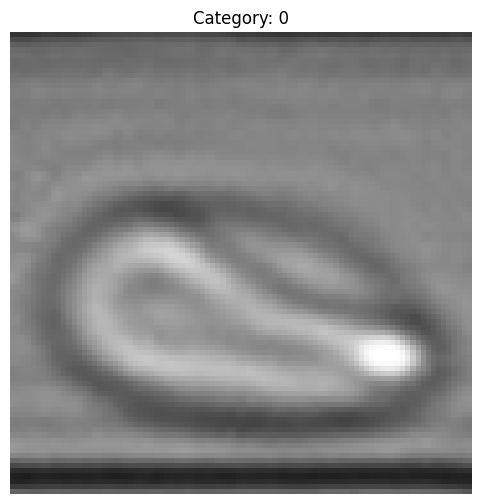

In [ ]:
# Visualize an image
n = 9000

plt.figure(figsize=(10, 6))
plt.imshow(X_plos_total[n])
plt.axis("off")
plt.title(f"Category: {y_plos_total[n]}")
plt.show()

## Save images

In [ ]:
save_images_by_category(
    X_plos_total,
    y_plos_total,
    output_dir="Final_dataset_PLOS",
    categories=categories_plos_training
)

In [ ]:
# After saving the cells
report_folder_distribution(output_dir="Final_dataset_PLOS")


Distribution of images in each folder:
Slipper: 4336 images
Sheared: 3110 images
Croissant: 3644 images


# 2024 study dataset

Folder: /gdrive/My Drive/Colab Notebooks/TX/Dataset_2024_study
Searching images
Found category: Slipper


Loading Slipper: 100%|██████████| 391/391 [00:08<00:00, 46.61it/s] 


Found category: Rolling


Loading Rolling: 100%|██████████| 390/390 [00:08<00:00, 45.59it/s] 


Found category: Parachute


Loading Parachute: 100%|██████████| 732/732 [00:18<00:00, 40.00it/s] 


Found category: semi-Slipper


Loading semi-Slipper: 100%|██████████| 201/201 [00:06<00:00, 32.53it/s] 


Found category: semi-Rolling


Loading semi-Rolling: 100%|██████████| 234/234 [00:06<00:00, 37.14it/s] 


Found category: semi-Parachute


Loading semi-Parachute: 100%|██████████| 311/311 [00:07<00:00, 40.87it/s] 


Completed! Loaded 2259 images in total.
  - Slipper: 391 images
  - Rolling: 390 images
  - Parachute: 732 images
  - semi-Slipper: 201 images
  - semi-Rolling: 234 images
  - semi-Parachute: 311 images


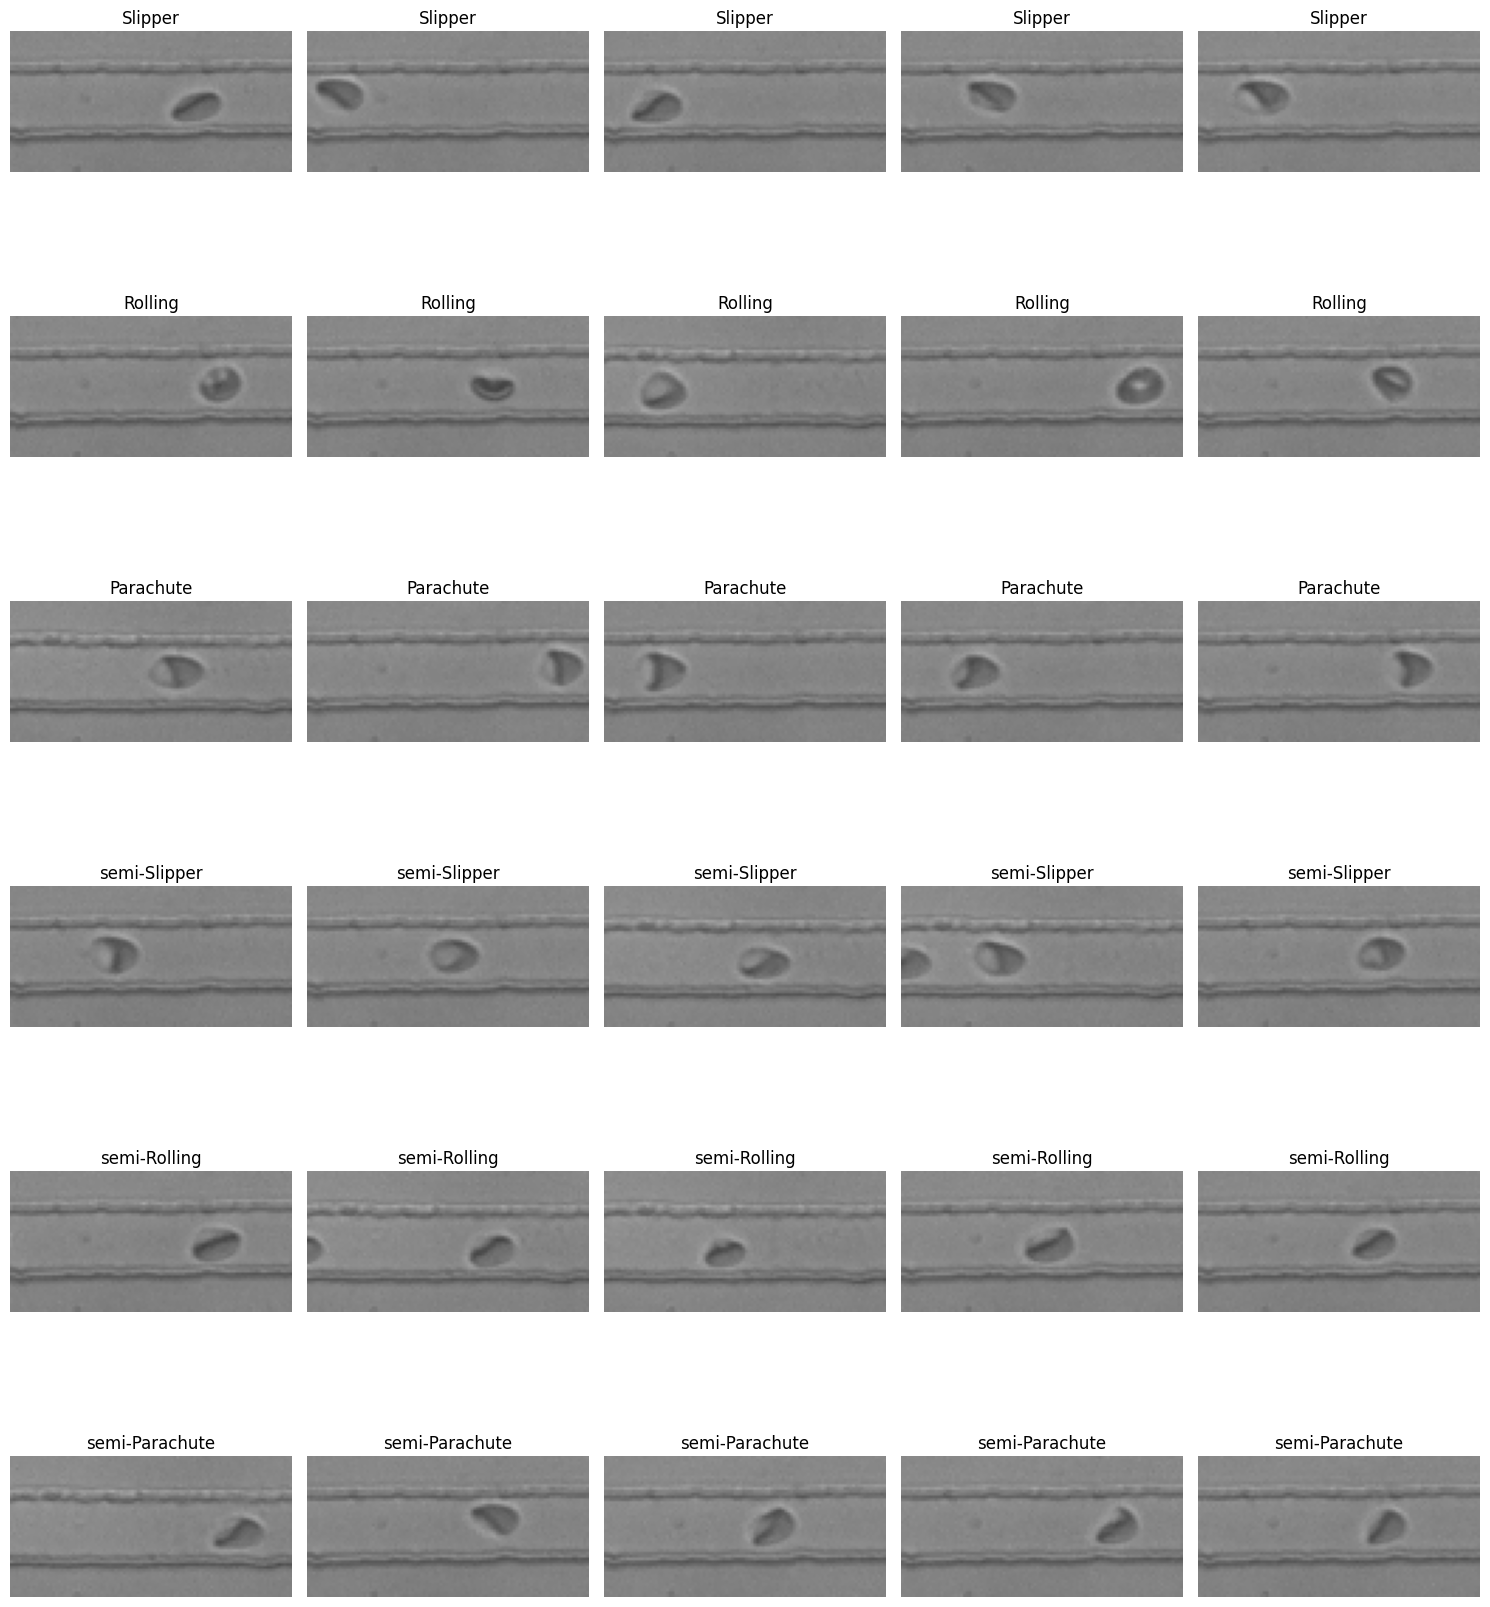

In [ ]:
folder_path_2024_study = "/gdrive/My Drive/Colab Notebooks/TX/Dataset_original/Dataset_2024_study"

if not os.path.exists(folder_path_2024_study):
  print(f"ERROR: {folder_path_2024_study} not found!")

# Categories target
categories_2024_study = ['Slipper', 'Rolling', 'Parachute', 'semi-Slipper', 'semi-Rolling', 'semi-Parachute']

# Load images
images_2024_study, labels_2024_study, paths_2024_study = load_images_to_array(folder_path_2024_study, categories_2024_study)

# Visualize images
if images_2024_study:
    show_sample_images(images_2024_study, labels_2024_study, categories_2024_study)


Height: {50, 66}
Width: {100}
Channel: {3}
Resizing all images to 50x100x3


Image resizing: 100%|██████████| 2259/2259 [00:00<00:00, 100006.68it/s]


Images (X):
  Shape: (2259, 50, 100, 3)
  Type: uint8

Labels (y):
  Shape: (2259,)
  Type: int64


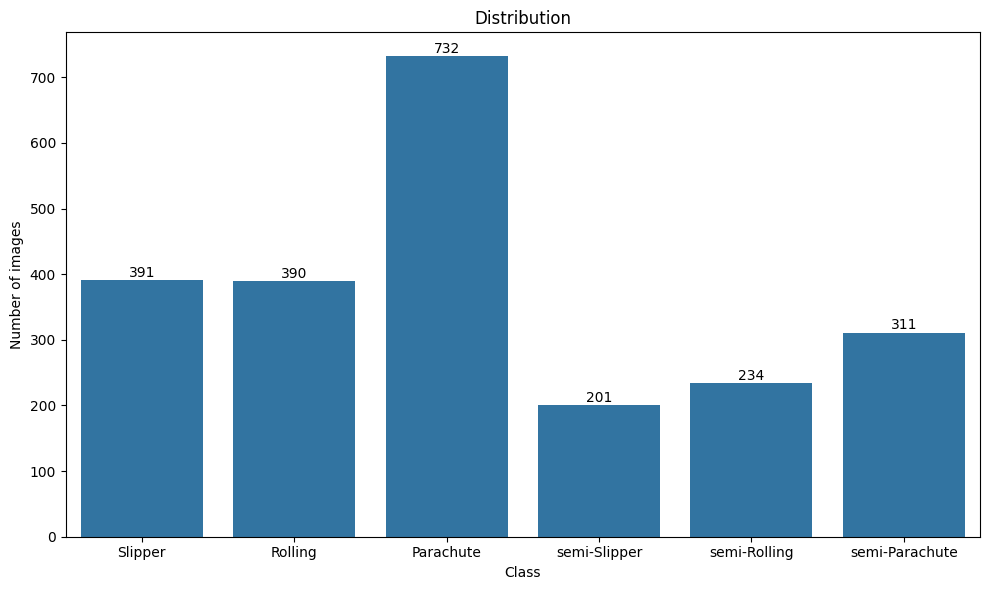

In [ ]:
# Convert into array NumPy
X_2024_study, y_2024_study = convert_to_numpy_arrays(images_2024_study, labels_2024_study)

if X_2024_study.size > 0:
    print("\nImages (X):")
    print(f"  Shape: {X_2024_study.shape}")
    print(f"  Type: {X_2024_study.dtype}")

    print("\nLabels (y):")
    print(f"  Shape: {y_2024_study.shape}")
    print(f"  Type: {y_2024_study.dtype}")

    unique, counts = np.unique(y_2024_study, return_counts=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=unique, y=counts)
    plt.title('Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of images')
    plt.xticks(range(len(categories_2024_study)), categories_2024_study)

    for i, count in enumerate(counts):
        plt.text(i, count + 5, str(count), ha='center')

    plt.tight_layout()
    plt.show()

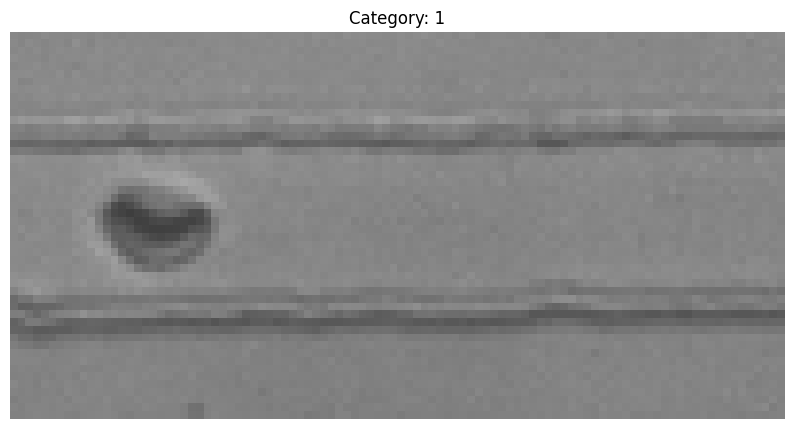

In [ ]:
# Visualize an image
n = 450

plt.figure(figsize=(10, 6))
plt.imshow(X_2024_study[n])
plt.axis("off")
plt.title(f"Category: {y_2024_study[n]}")
plt.show()

# Nouaman dataset

Processing category: Slipper
Found 5 mbar folders in Slipper:
- 0500mbar
- 1000mbar
- 0700mbar
- 0300mbar
- 0100mbar
Scanning 0500mbar in Slipper


Loading Slipper/0500mbar: 100%|██████████| 11/11 [00:00<00:00, 275.10it/s]


Scanning 1000mbar in Slipper


Loading Slipper/1000mbar: 100%|██████████| 8/8 [00:00<00:00, 195.20it/s]


Scanning 0700mbar in Slipper


Loading Slipper/0700mbar: 100%|██████████| 16/16 [00:00<00:00, 244.28it/s]


Scanning 0300mbar in Slipper


Loading Slipper/0300mbar: 100%|██████████| 15/15 [00:00<00:00, 288.32it/s]


Scanning 0100mbar in Slipper


Loading Slipper/0100mbar: 100%|██████████| 31/31 [00:00<00:00, 249.36it/s]


Processing category: Other
Found 5 mbar folders in Other:
- 0500mbar
- 0100mbar
- 0300mbar
- 0700mbar
- 0900mbar
Scanning 0500mbar in Other


Loading Other/0500mbar: 100%|██████████| 9/9 [00:00<00:00, 281.51it/s]


Scanning 0100mbar in Other


Loading Other/0100mbar: 100%|██████████| 18/18 [00:00<00:00, 237.98it/s]


Scanning 0300mbar in Other


Loading Other/0300mbar: 100%|██████████| 14/14 [00:00<00:00, 286.40it/s]


Scanning 0700mbar in Other


Loading Other/0700mbar: 100%|██████████| 9/9 [00:00<00:00, 276.08it/s]


Scanning 0900mbar in Other


Loading Other/0900mbar: 100%|██████████| 8/8 [00:00<00:00, 174.17it/s]


Processing category: Croissant
Found 6 mbar folders in Croissant:
- 0600mbar
- 0200mbar
- 0400mbar
- 1000mbar
- 0800mbar
- 0050mbar
Scanning 0600mbar in Croissant


Loading Croissant/0600mbar: 100%|██████████| 8/8 [00:00<00:00, 259.01it/s]


Scanning 0200mbar in Croissant


Loading Croissant/0200mbar: 100%|██████████| 15/15 [00:00<00:00, 286.09it/s]


Scanning 0400mbar in Croissant


Loading Croissant/0400mbar: 100%|██████████| 13/13 [00:00<00:00, 219.57it/s]


Scanning 1000mbar in Croissant


Loading Croissant/1000mbar: 100%|██████████| 10/10 [00:00<00:00, 306.83it/s]


Scanning 0800mbar in Croissant


Loading Croissant/0800mbar: 100%|██████████| 15/15 [00:00<00:00, 291.86it/s]


Scanning 0050mbar in Croissant


Loading Croissant/0050mbar: 100%|██████████| 15/15 [00:00<00:00, 222.87it/s]


Completed! Loaded 215 images in total.
  - Slipper: 81 images
  - Other: 58 images
  - Croissant: 76 images


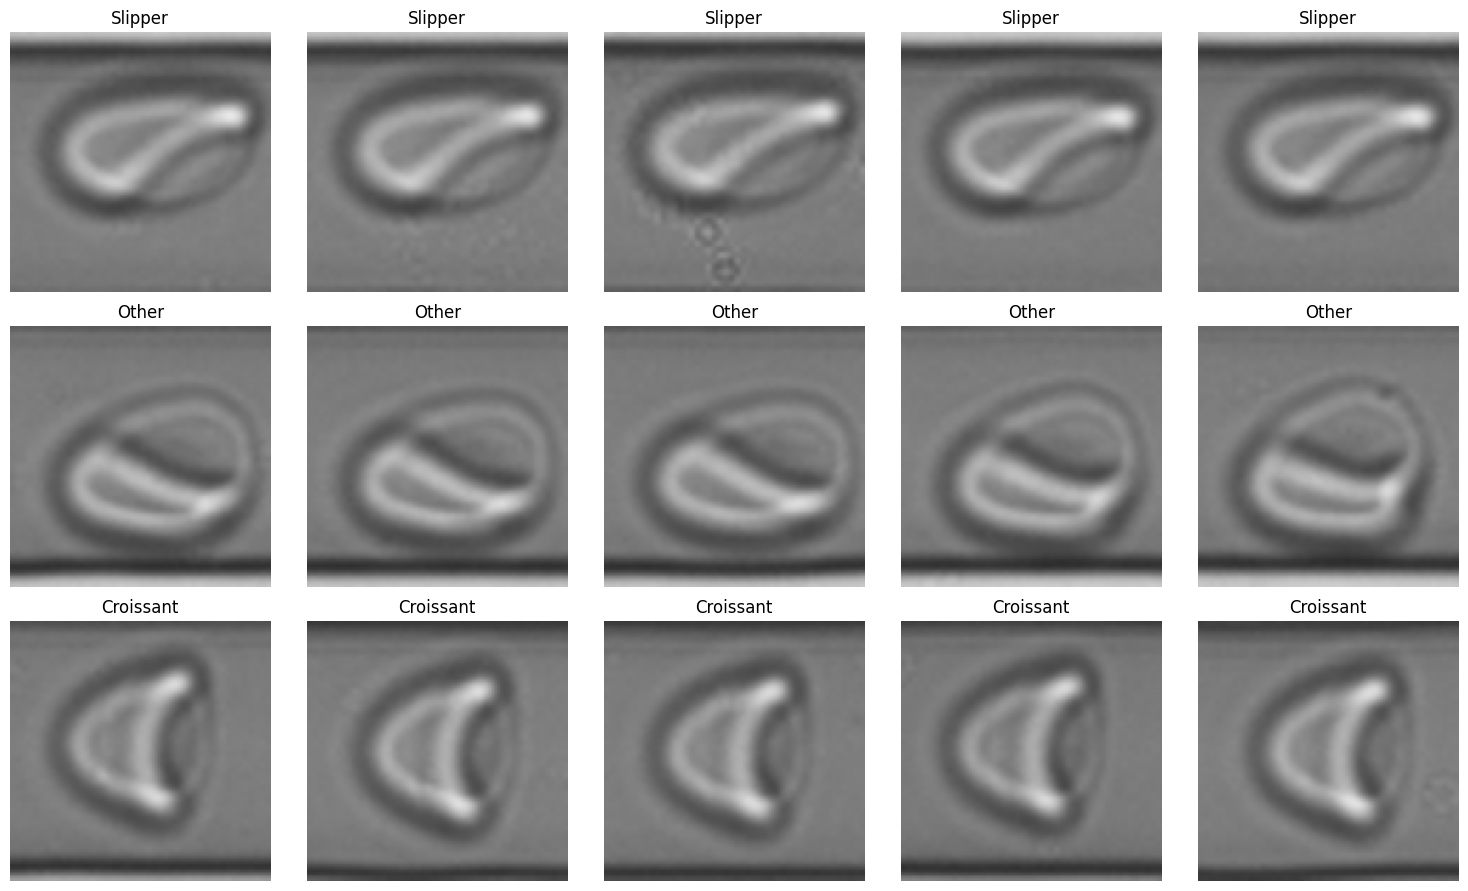

In [ ]:
folder_path_nouaman = "/gdrive/My Drive/Colab Notebooks/TX/Dataset_original/Dataset_Nouaman"

if not os.path.exists(folder_path_nouaman):
  print(f"ERROR: {folder_path_nouaman} not found!")

# Categories target
categories_nouaman = ['Slipper', 'Other', 'Croissant']

# Load images
images_nouaman, labels_nouaman, paths_nouaman = load_images_to_array_nouaman(folder_path_nouaman, categories_nouaman)

# Visualize images
if images_nouaman:
    show_sample_images(images_nouaman, labels_nouaman, categories_nouaman)



Images (X):
  Shape: (215, 92, 92, 3)
  Type: uint8

Labels (y):
  Shape: (215,)
  Type: int64


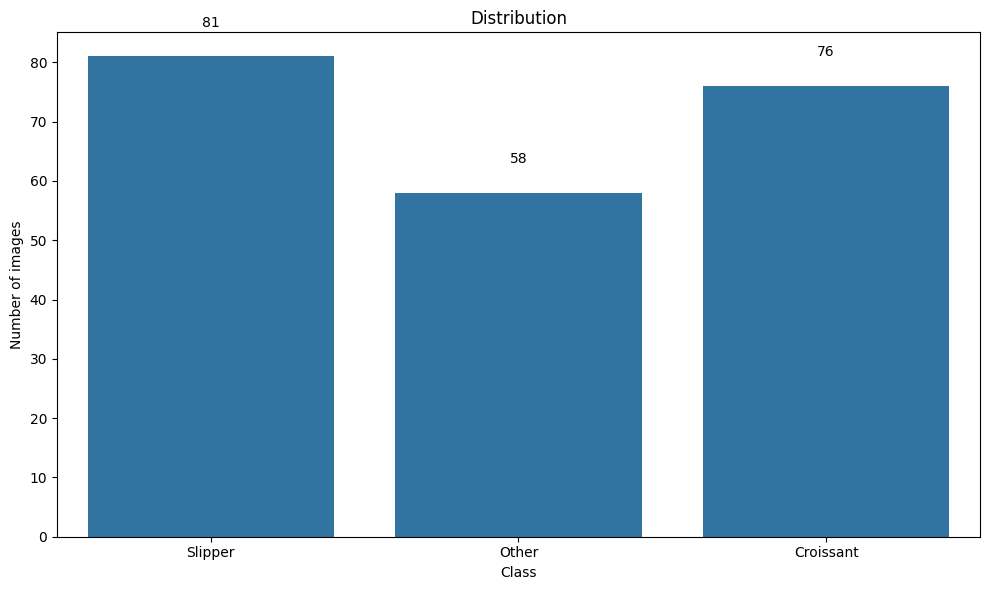

In [ ]:
# Convert into array NumPy
X_nouaman, y_nouaman = convert_to_numpy_arrays(images_nouaman, labels_nouaman)

if X_nouaman.size > 0:
    print("\nImages (X):")
    print(f"  Shape: {X_nouaman.shape}")
    print(f"  Type: {X_nouaman.dtype}")

    print("\nLabels (y):")
    print(f"  Shape: {y_nouaman.shape}")
    print(f"  Type: {y_nouaman.dtype}")

    unique, counts = np.unique(y_nouaman, return_counts=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=unique, y=counts)
    plt.title('Distribution')
    plt.xlabel('Class')
    plt.ylabel('Number of images')
    plt.xticks(range(len(categories_nouaman)), categories_nouaman)

    for i, count in enumerate(counts):
        plt.text(i, count + 5, str(count), ha='center')

    plt.tight_layout()
    plt.show()

## Save images

In [ ]:
save_images_by_category(
    X_nouaman,
    y_nouaman,
    output_dir="Final_dataset_Nouaman",
    categories=categories_nouaman
)

Saved 215 images in Final_dataset_Nouaman


In [ ]:
# After saving the cells
report_folder_distribution(output_dir="Final_dataset_Nouaman")


Distribution of images in each folder:
Slipper: 81 images
Other: 58 images
Croissant: 76 images


# German dataset

In [6]:
# Path to your folder containing BMP images
folder_path_german_input = "/gdrive/My Drive/Colab Notebooks/TX/Dataset_original/RBC seq for Badr Kaoui/RBC seq for Badr Kaoui"

if not os.path.exists(folder_path_german_input):
  print(f"ERROR: {folder_path_german_input} not found!")

# Load images
images_german_input, paths_german_input = load_images_to_array_tif(folder_path_german_input)

Found 8 folders:
- v 1.25 cm_s
- v 1 cm_s
- v 0.9 cm_s
- v 1.56 cm_s
- v 0.56 cm_s
- v 0.12 cm_s
- v 0.44 cm_s
- v 0.7 cm_s
Scanning the folder: v 1.25 cm_s


Loading images from v 1.25 cm_s: 100%|██████████| 157/157 [00:09<00:00, 16.74it/s]


Scanning the folder: v 1 cm_s


Loading images from v 1 cm_s: 100%|██████████| 48/48 [00:20<00:00,  2.31it/s]


Scanning the folder: v 0.9 cm_s


Loading images from v 0.9 cm_s: 100%|██████████| 73/73 [00:32<00:00,  2.23it/s]


Scanning the folder: v 1.56 cm_s


Loading images from v 1.56 cm_s: 100%|██████████| 300/300 [00:14<00:00, 21.08it/s]


Scanning the folder: v 0.56 cm_s


Loading images from v 0.56 cm_s: 100%|██████████| 268/268 [00:11<00:00, 22.68it/s]


Scanning the folder: v 0.12 cm_s


Loading images from v 0.12 cm_s: 100%|██████████| 79/79 [00:37<00:00,  2.11it/s]


Scanning the folder: v 0.44 cm_s


Loading images from v 0.44 cm_s: 100%|██████████| 210/210 [00:10<00:00, 20.01it/s]


Scanning the folder: v 0.7 cm_s


Loading images from v 0.7 cm_s: 100%|██████████| 248/248 [00:14<00:00, 17.68it/s]

Completed! Loaded 18498 images in total.


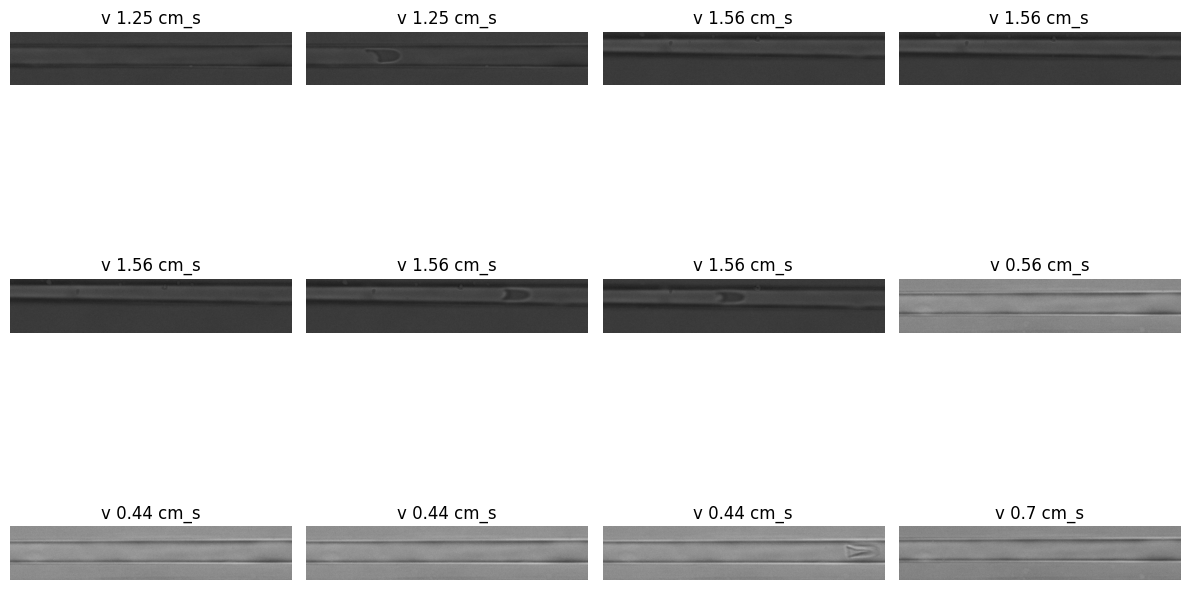

In [7]:
import random
import math # Import math for ceil function

def show_sample_images_tif(images, paths, num_samples=5):
    """
    View some sample TIF images, arranged in a grid with 4 columns.

    Args:
        images: List of loaded images (NumPy arrays).
        paths: List of original file paths for each image.
        num_samples: Number of samples to display.
    """

    if not images:
        print("No images to visualize.")
        return

    # Determine the actual number of samples to show (don't exceed available images)
    samples_to_show = min(num_samples, len(images))

    # Define the number of columns
    num_cols = 4
    # Calculate the number of rows needed based on samples_to_show and num_cols
    num_rows = math.ceil(samples_to_show / num_cols)

    # Randomly select indices for the images to display
    sample_indices = random.sample(range(len(images)), samples_to_show)
    sample_indices.sort() # Sort to keep some order, though not strictly necessary

    # Create a figure and a set of subplots for the images
    # The layout is now num_rows x num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(3 * num_cols, 3 * num_rows))

    # Flatten the axes array for easier iteration if there's more than one row/column
    # If num_rows is 1 and num_cols is 1, axes is a single Axes object, not an array.
    # If num_rows is 1 and num_cols > 1, axes is a 1D array of Axes objects.
    # If num_rows > 1, axes is a 2D array of Axes objects.
    # We'll flatten it to always iterate over a 1D list of axes.
    if num_rows == 1 and num_cols == 1:
        axes = [axes]
    elif num_rows == 1:
        pass # axes is already a 1D array for a single row
    else:
        axes = axes.flatten()

    # Iterate through the selected sample indices and display each image
    for i, img_idx in enumerate(sample_indices):
        ax = axes[i] # Access the current subplot from the flattened axes list

        # Get the image and its path
        img = images[img_idx]
        img_path = paths[img_idx]

        # Extract the immediate parent directory name for the title
        folder_name = os.path.basename(os.path.dirname(img_path))

        # Display the image
        ax.imshow(img)
        # Set the title to the folder name
        ax.set_title(f"{folder_name}")
        # Turn off the axis ticks and labels for cleaner visualization
        ax.axis('off')

    # Hide any unused subplots (if samples_to_show is not a perfect multiple of num_cols)
    for j in range(samples_to_show, num_rows * num_cols):
        axes[j].axis('off')

    # Adjust layout to prevent titles/images from overlapping
    plt.tight_layout()
    # Display the plot
    plt.show()

# Show 10 images
show_sample_images_tif(images_german_input, paths_german_input, num_samples=12)

In [8]:
# Convert into array NumPy
category = ['NotDefined']
X_german_input, y_german_input = convert_to_numpy_arrays(images_german_input, category)

print(f"  Shape: {X_german_input.shape}")
print(f"  Type: {X_german_input.dtype}")

  Shape: (18498, 128, 672, 3)
  Type: uint8


# Italian dataset

In [ ]:
# Path to your folder containing BMP images
folder_path_italian = "/gdrive/My Drive/Colab Notebooks/TX/Dataset_original/LOW_HIGH_PRESSURE_12_8"

if not os.path.exists(folder_path_italian):
  print(f"ERROR: {folder_path_italian} not found!")

# Load images
images_italian, paths_italian = load_videos(folder_path_italian)

Found 3 folders:
- blood_donor_1
- blood_donor_2
- blood_donor_3
Scanning the folder: blood_donor_1


Loading frames from videos in blood_donor_1:  50%|█████     | 1/2 [00:14<00:14, 14.99s/it]

# Create the final dataset

In [ ]:
def load_images(folder_path, categories):
    """
    Load all PNG images from the specified folders into a NumPy array

    Args:
        folder_path: Path to the root folder
        categories: Categories of images

    Returns:
        images: List of uploaded images
        labels: List of labels for each image (category)
        paths: List of paths to original files

    """

    images = []
    labels = []
    paths = []

    category_to_idx = {cat: idx for idx, cat in enumerate(categories)}

    if not os.path.exists(folder_path):
        print(f"ERROR: {folder_path} don't exist!")
        return images, labels, paths

    print(f"Folder: {folder_path}")

    print("Searching images")
    for category in categories:
        category_path = os.path.join(folder_path, category)

        if os.path.isdir(category_path):
            print(f"Found category: {category}")

            png_files = glob.glob(os.path.join(category_path, '**', '*.png'), recursive=True)

            for png_file in tqdm(png_files, desc=f"Loading {category}"):
                img = cv2.imread(png_file)

                if img is not None:
                    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

                    images.append(img_rgb)
                    labels.append(category_to_idx[category])
                    paths.append(png_file)

    print(f"Completed! Loaded {len(images)} images in total.")

    for category, idx in category_to_idx.items():
        count = labels.count(idx)
        print(f"  - {category}: {count} images")

    return images, labels

In [ ]:
def save_images_by_label(images, labels, output_root_folder, category_names):
    """
    Saves images into subfolders based on their labels, using category names.

    Args:
        images (list): List of images (NumPy arrays).
        labels (list): List of corresponding numerical labels.
        output_root_folder (str): Path to the root folder where label subfolders will be created.
        category_names (list): List of category names corresponding to the numerical labels.
    """
    if not os.path.exists(output_root_folder):
        os.makedirs(output_root_folder)
        print(f"Created output root folder: {output_root_folder}")

    # Ensure category names match labels
    if len(category_names) != len(set(labels)):
        raise ValueError("Number of category names must match the number of unique labels.")

    unique_labels = sorted(list(set(labels)))
    label_to_folder = {label: os.path.join(output_root_folder, category_names[label]) for label in unique_labels}

    for folder in label_to_folder.values():
        if not os.path.exists(folder):
            os.makedirs(folder)
            print(f"Created label folder: {folder}")

    print("Saving images...")
    for i, image in enumerate(tqdm(images, desc="Saving")):
        label = labels[i]
        output_path = os.path.join(label_to_folder[label], f"image_{i}.png")
        cv2.imwrite(output_path, cv2.cvtColor(image, cv2.COLOR_RGB2BGR))  # Save as BGR

    print("Finished saving images.")

In [ ]:
folder_path_2024_study = "/gdrive/My Drive/Colab Notebooks/TX/Final_dataset_2024"
folder_path_plos = "/gdrive/My Drive/Colab Notebooks/TX/Final_dataset_PLOS"
folder_path_nouaman = "/gdrive/My Drive/Colab Notebooks/TX/Final_dataset_Nouaman"

categories_2024_study = ['Slipper', 'semi-Slipper', 'Parachute', 'semi-Parachute']
categories_plos = ['Slipper', 'Sheared', 'Croissant']
categories_nouaman = ['Slipper', 'Other', 'Croissant']

images_2024, labels_2024 = load_images(folder_path_2024_study, categories_2024_study)
images_PLOS, labels_PLOS = load_images(folder_path_plos_training, categories_plos)
images_Nouaman, labels_Nouaman = load_images(folder_path_nouaman, categories_nouaman)


Folder: /gdrive/My Drive/Colab Notebooks/TX/Final_dataset_2024
Searching images
Found category: Slipper


Loading Slipper: 100%|██████████| 248/248 [00:01<00:00, 237.11it/s]


Found category: semi-Slipper


Loading semi-Slipper: 100%|██████████| 179/179 [00:00<00:00, 247.47it/s]


Found category: Parachute


Loading Parachute: 100%|██████████| 682/682 [00:03<00:00, 225.96it/s]


Found category: semi-Parachute


Loading semi-Parachute: 100%|██████████| 285/285 [00:01<00:00, 241.21it/s]


Completed! Loaded 1394 images in total.
  - Slipper: 248 images
  - semi-Slipper: 179 images
  - Parachute: 682 images
  - semi-Parachute: 285 images
Folder: /gdrive/My Drive/Colab Notebooks/TX/Final_dataset_PLOS
Searching images
Found category: Slipper


Loading Slipper: 100%|██████████| 4336/4336 [00:19<00:00, 224.70it/s]


Found category: Sheared


Loading Sheared: 100%|██████████| 3110/3110 [00:35<00:00, 87.68it/s] 


Found category: Croissant


Loading Croissant: 100%|██████████| 3644/3644 [00:43<00:00, 84.69it/s] 


Completed! Loaded 11090 images in total.
  - Slipper: 4336 images
  - Sheared: 3110 images
  - Croissant: 3644 images
Folder: /gdrive/My Drive/Colab Notebooks/TX/Final_dataset_Nouaman
Searching images
Found category: Slipper


Loading Slipper: 100%|██████████| 81/81 [00:00<00:00, 238.81it/s]


Found category: Other


Loading Other: 100%|██████████| 58/58 [00:00<00:00, 225.83it/s]


Found category: Croissant


Loading Croissant: 100%|██████████| 76/76 [00:00<00:00, 236.47it/s]

Completed! Loaded 215 images in total.
  - Slipper: 81 images
  - Other: 58 images
  - Croissant: 76 images


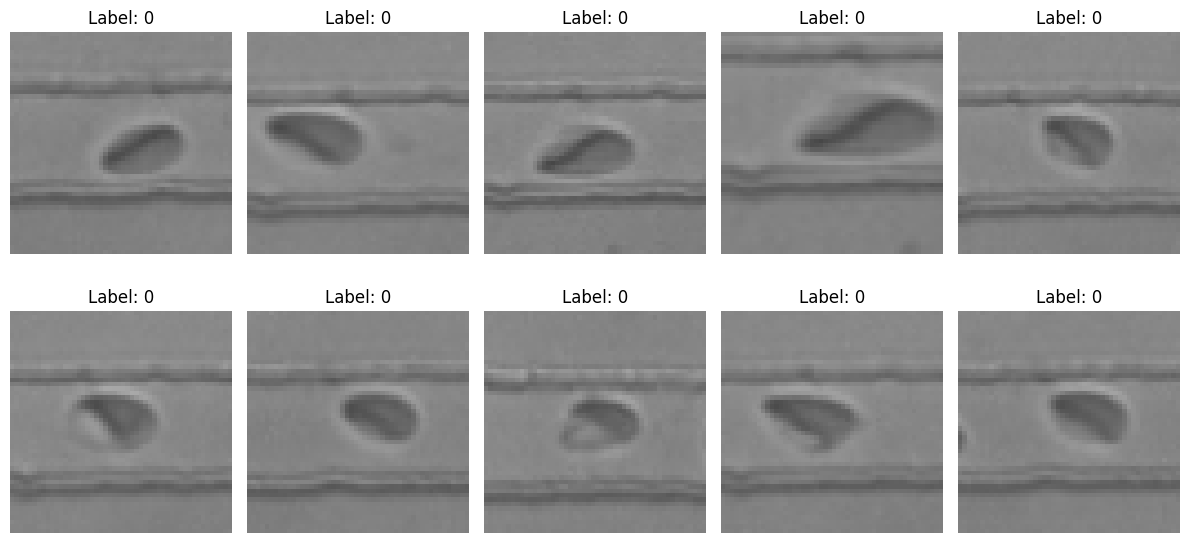

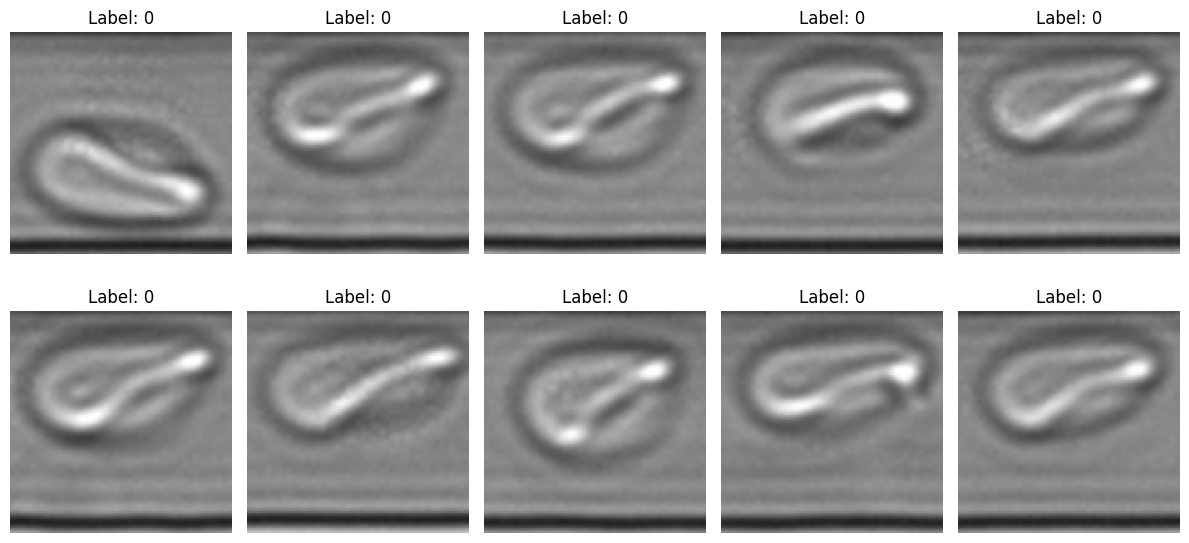

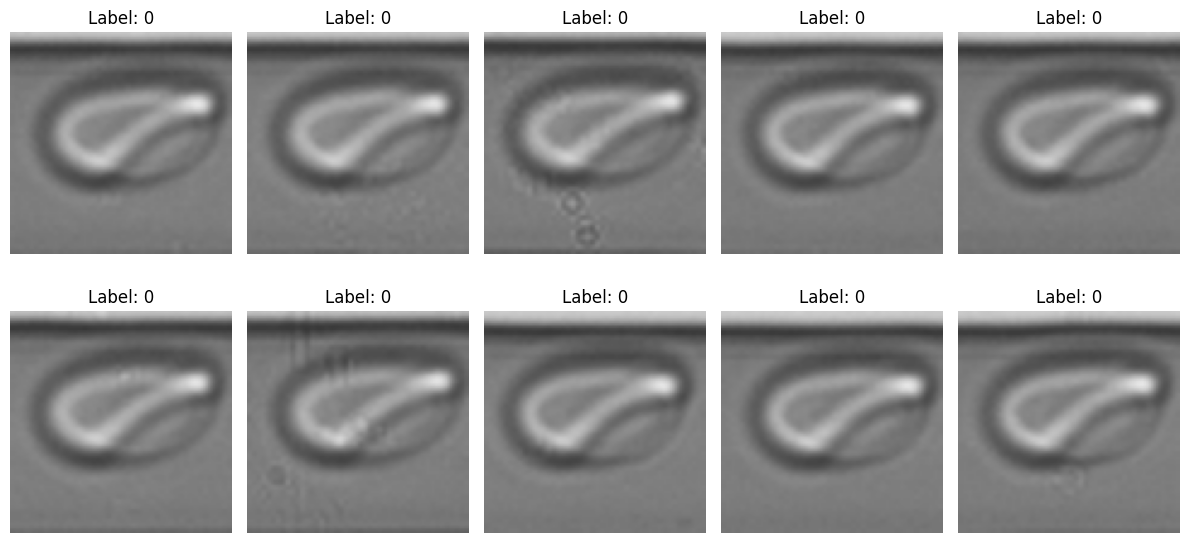

In [ ]:
# Visualize the first 10 images of each ground with their labels
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(images_2024[i])
    axes[i].set_title(f"Label: {labels_2024[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(images_PLOS[i])
    axes[i].set_title(f"Label: {labels_PLOS[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(images_Nouaman[i])
    axes[i].set_title(f"Label: {labels_Nouaman[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Print size of images
print(f"Size of images_2024: {images_2024[0].shape}")
print(f"Size of images_PLOS: {images_PLOS[0].shape}")
print(f"Size of images_Nouaman: {images_Nouaman[0].shape}")

Size of images_2024: (50, 50, 3)
Size of images_PLOS: (90, 90, 3)
Size of images_Nouaman: (92, 92, 3)


In [ ]:
# Unify semi-Slipper and semi-Parachute in one class
for i in range(len(labels_2024)):
    if labels_2024[i] == 3:
        labels_2024[i] = 1

In [ ]:
y_total = np.concatenate((labels_2024, labels_PLOS, labels_Nouaman), axis=0)


Labels (y):
  Shape: (12699,)


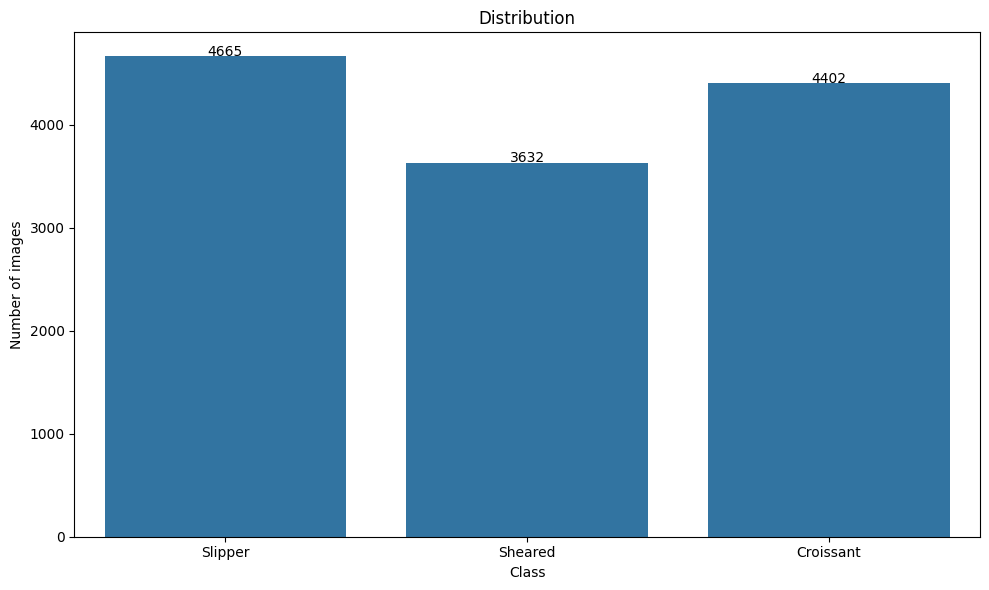

In [ ]:
print("\nLabels (y):")
print(f"  Shape: {y_total.shape}")

unique, counts = np.unique(y_total, return_counts=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=unique, y=counts)
plt.title('Distribution')
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.xticks(range(len(categories_plos)), categories_plos)

for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center')

plt.tight_layout()
plt.show()

In [ ]:
# Combine all images and labels
all_images = images_2024 + images_PLOS + images_Nouaman
all_labels = labels_2024 + labels_PLOS + labels_Nouaman

# Define the output root folder
output_root = "/gdrive/My Drive/Colab Notebooks/TX/Dataset_final"

# Save the combined images by their unified labels
save_images_by_label(all_images, all_labels, output_root, categories_plos)

Created output root folder: /gdrive/My Drive/Colab Notebooks/TX/Dataset_final
Created label folder: /gdrive/My Drive/Colab Notebooks/TX/Dataset_final/Slipper
Created label folder: /gdrive/My Drive/Colab Notebooks/TX/Dataset_final/Sheared
Created label folder: /gdrive/My Drive/Colab Notebooks/TX/Dataset_final/Croissant
Saving images...


Saving: 100%|██████████| 12699/12699 [01:32<00:00, 136.70it/s]

Finished saving images.


In [ ]:
report_folder_distribution(output_dir="Dataset_final")


Distribution of images in each folder:
Slipper: 4665 images
Sheared: 3632 images
Croissant: 4402 images
